In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model


In [ ]:
df=pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


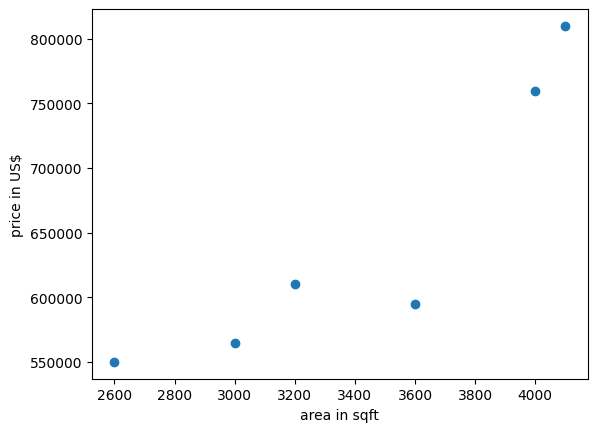

In [ ]:
#%matplotlib inline
plt.xlabel('area in sqft')
plt.ylabel('price in US$')
plt.scatter(df.area,df.price)
plt.show()

In [ ]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

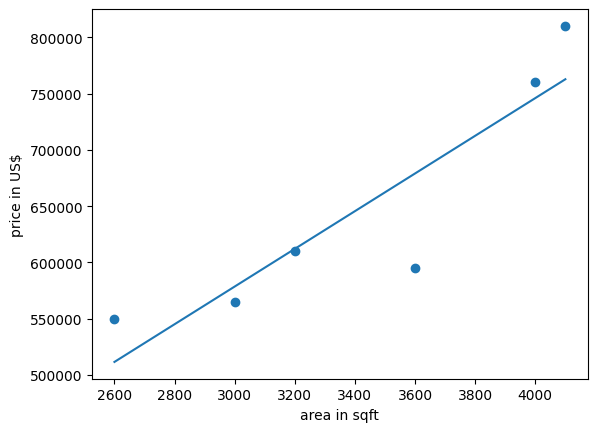

In [ ]:
%matplotlib inline
plt.xlabel('area in sqft')
plt.ylabel('price in US$')
plt.scatter(df.area,df.price)
plt.plot(df.area,reg.predict(df[['area']]))

In [ ]:
reg.predict([[3000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578621.02217936])

In [ ]:
reg.coef_

array([167.30954677])

In [ ]:
reg.intercept_

76692.38187078107

In [ ]:
newdf=pd.read_csv('areas.csv')
newdf

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [ ]:
p = reg.predict(newdf)
newdf['prices']=p
newdf['prices']

0     2.440019e+05
1     3.276567e+05
2     4.615043e+05
3     6.689682e+05
4     7.660077e+05
5     8.396239e+05
6     9.952218e+05
7     6.555834e+05
8     8.714127e+05
9     4.615043e+05
10    1.582478e+06
11    1.515554e+06
12    1.264590e+06
Name: prices, dtype: float64

In [ ]:
newdf.to_csv('predicted.csv',index=False)

In [ ]:
#exercise
dataf=pd.read_csv('canada_per_capita_income.csv')
dataf.tail()

,year,per capita income (US$)
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


In [ ]:
reg=linear_model.LinearRegression()
reg.fit(dataf[['year']],dataf['per capita income (US$)'])

LinearRegression()

In [ ]:
reg.predict([[2020]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [ ]:
#linear regression multi variable

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model


In [ ]:
df=pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
import math
median=math.floor(df.bedrooms.median())
median

4

In [ ]:
df.bedrooms=df.bedrooms.fillna(median)

In [ ]:
reg=linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [ ]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
reg.intercept_

221323.00186540396

In [ ]:
reg.predict([[3000,3,40]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from word2number import w2n

In [ ]:
ndf = pd.read_csv("hiring.csv")
ndf

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
ndf.experience=ndf.experience.fillna('zero')
ndf

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
ndf.experience=ndf.experience.apply(w2n.word_to_num)
ndf

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [ ]:
median_test_score = ndf['test_score(out of 10)'].median()
median_test_score

8.0

In [ ]:
ndf['test_score(out of 10)']=ndf['test_score(out of 10)'].fillna(median_test_score)
ndf

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
reg=linear_model.LinearRegression()
reg.fit(ndf[['experience' ,'test_score(out of 10)','interview_score(out of 10)']] ,ndf['salary($)'])

LinearRegression()

In [ ]:
reg.predict([[2,6,9]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([54284.5705968])